<a href="https://colab.research.google.com/github/sugiyaaan/Deep-Learning/blob/master/LSTM_wave_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM, GRU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import numpy as np

import matplotlib.pyplot as plt

Using TensorFlow backend.


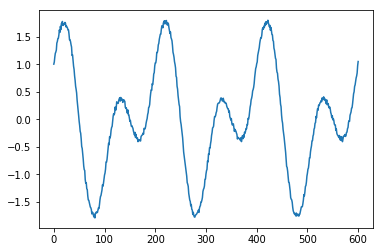

In [2]:
def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T)
  
def cos(x, T=100):
    return np.cos(2.0 * np.pi * x / T)

# sin波にノイズを付与する
def toy_problem(T=300):
    x = np.arange(0, 2 * T + 1)
    noise =  np.random.uniform(low=-0.05, high=0.05, size=len(x))
    return sin(x) + cos(x/2) + noise

f = toy_problem()
plt.plot(f)

In [0]:
def make_dataset(low_data):

    data, target = [], []
    maxlen = 25

    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:i + maxlen])
        target.append(low_data[i + maxlen])

    re_data = np.array(data).reshape(len(data), maxlen, 1)
    re_target = np.array(target).reshape(len(data), 1)

    return re_data, re_target

x_train, y_train = make_dataset(f)

In [4]:
# データの中身がわからない場合は、printしてみてみましょう
# 特に, データのフォーマットの概観を把握するにはshapeが便利.
print(x_train.shape) # 1次元のデータが25個連なったデータ
print(x_train)

(576, 25, 1)
[[[ 1.00075711]
  [ 1.04028876]
  [ 1.12993112]
  ...
  [ 1.75932983]
  [ 1.74551174]
  [ 1.67841435]]

 [[ 1.04028876]
  [ 1.12993112]
  [ 1.19745452]
  ...
  [ 1.74551174]
  [ 1.67841435]
  [ 1.69366067]]

 [[ 1.12993112]
  [ 1.19745452]
  [ 1.22113414]
  ...
  [ 1.67841435]
  [ 1.69366067]
  [ 1.67721784]]

 ...

 [[-0.29247179]
  [-0.27810915]
  [-0.31344709]
  ...
  [ 0.68477725]
  [ 0.74925818]
  [ 0.78521379]]

 [[-0.27810915]
  [-0.31344709]
  [-0.29664504]
  ...
  [ 0.74925818]
  [ 0.78521379]
  [ 0.83976331]]

 [[-0.31344709]
  [-0.29664504]
  [-0.24127916]
  ...
  [ 0.78521379]
  [ 0.83976331]
  [ 0.97184797]]]


In [5]:
print(y_train)

[[ 1.69366067e+00]
 [ 1.67721784e+00]
 [ 1.65713746e+00]
 [ 1.62254059e+00]
 [ 1.62234661e+00]
 [ 1.54529950e+00]
 [ 1.44236216e+00]
 [ 1.44273839e+00]
 [ 1.40959685e+00]
 [ 1.35397267e+00]
 [ 1.31203669e+00]
 [ 1.15817886e+00]
 [ 1.16884326e+00]
 [ 1.07256987e+00]
 [ 9.63273036e-01]
 [ 9.04586694e-01]
 [ 7.87365025e-01]
 [ 7.08680407e-01]
 [ 5.99919061e-01]
 [ 5.44462560e-01]
 [ 4.76247243e-01]
 [ 3.45007129e-01]
 [ 2.54301202e-01]
 [ 1.78722967e-01]
 [ 6.43211943e-02]
 [-3.91043413e-02]
 [-1.16089095e-01]
 [-2.19064607e-01]
 [-2.54659723e-01]
 [-3.57627209e-01]
 [-4.95491695e-01]
 [-5.30831560e-01]
 [-6.23816826e-01]
 [-7.24590769e-01]
 [-8.50593000e-01]
 [-9.16110868e-01]
 [-9.32853927e-01]
 [-1.09972293e+00]
 [-1.16432795e+00]
 [-1.15533275e+00]
 [-1.26493027e+00]
 [-1.27810103e+00]
 [-1.39552743e+00]
 [-1.46797871e+00]
 [-1.47253447e+00]
 [-1.51322317e+00]
 [-1.54961192e+00]
 [-1.59704532e+00]
 [-1.60947317e+00]
 [-1.64091986e+00]
 [-1.72125399e+00]
 [-1.69063586e+00]
 [-1.6974974

In [6]:
length_of_sequence = x_train.shape[1] 
in_out_neurons = 1 # 1次元の入力が入り、1次元の出力を出す
n_hidden = 800

model = Sequential()
model.add(GRU(n_hidden, batch_input_shape=(None, length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(lr=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)

W0715 14:16:27.119807 140692344686464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 14:16:27.165770 140692344686464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 14:16:27.174266 140692344686464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0715 14:16:28.580126 140692344686464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [7]:
early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=5)
model.fit(x_train, y_train,
          batch_size=300,
          epochs=100,
          validation_split=0.1,
          callbacks=[early_stopping],
          verbose=1
          )

W0715 14:16:38.360449 140692344686464 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0715 14:16:38.717616 140692344686464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0715 14:16:38.820242 140692344686464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 518 samples, validate on 58 samples
Epoch 1/100
518/518 [==============================] - 5s 9ms/step - loss: 0.9518 - val_loss: 0.0498
Epoch 2/100
518/518 [==============================] - 0s 520us/step - loss: 0.1303 - val_loss: 0.0235
Epoch 3/100
518/518 [==============================] - 0s 468us/step - loss: 0.0723 - val_loss: 0.0139
Epoch 4/100
518/518 [==============================] - 0s 434us/step - loss: 0.0347 - val_loss: 0.0178
Epoch 5/100
518/518 [==============================] - 0s 436us/step - loss: 0.0626 - val_loss: 0.0167
Epoch 6/100
518/518 [==============================] - 0s 438us/step - loss: 0.0513 - val_loss: 0.0124
Epoch 7/100
518/518 [==============================] - 0s 434us/step - loss: 0.0229 - val_loss: 0.0095
Epoch 8/100
518/518 [==============================] - 0s 440us/step - loss: 0.0137 - val_loss: 0.0094
Epoch 9/100
518/518 [==============================] - 0s 450us/step - loss: 0.0244 - val_loss: 0.0083
Epoch 10/100
518/518 [========

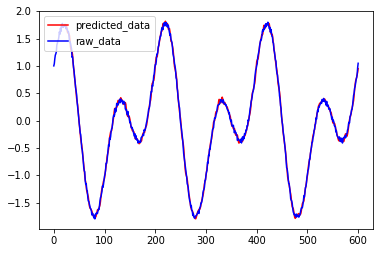

In [8]:
predicted = model.predict(x_train)
plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="predicted_data")
plt.plot(range(0, len(f)), f, color="b", label="raw_data")
plt.legend()
plt.show()